In [171]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import seaborn as sns
import wandb

In [172]:
api = wandb.Api()
run = api.run("varadi-epfl/sub-n-grams/1uebzxx8")

h = run.scan_history(keys=["loss", "grad_norm", "A_layer0_head1_norm", "A_layer0_head0_norm", "QK_norm", "step", "bayes", "unigram", "bigram"])

In [173]:
ungiram = run.summary["unigram"]
bigram = run.summary["bigram"]
bayes = run.summary["bayes"]

In [174]:
print(row for row in h)

<generator object <genexpr> at 0x30c5bda80>


In [175]:
losses = [row["loss"] for row in h]
grad_norms = [row["grad_norm"] for row in h]
bayes = [row["bayes"] for row in h]
unigram = [row["unigram"] for row in h]
bigram = [row["bigram"] for row in h]
step = [row["step"] for row in h]


In [178]:
custom_CMAP = sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True, reverse=True)
colors = custom_CMAP(jnp.linspace(0, 1, 7))

def plot_losses(
    test_losses,
    bayes,
    save_every,
    fontsize=20,
    unigram=None,
    bigram=None,
    trigram=None,
):
    fig = plt.figure(figsize=(12, 6))
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # if unigram is not None:
    #     plt.axhline(unigram, c=colors[6], ls="--", label="Unigram", linewidth=3 )
    # if bigram is not None:
    #     plt.axhline(bigram[0], c=colors[5], ls="--", label="Bayes", linewidth=3 )

    ax1.plot(step, jnp.array(test_losses), c=colors[0], linewidth=3, label="Loss")
    ax2.plot(step, jnp.array(grad_norms), c=colors[3], linewidth=3 , label="Gradient")


    fig.legend(fontsize=fontsize * 0.8, loc = (0.680,0.820))
    # sns.despine()
    ax1.set_xlabel("Step", fontsize=fontsize)
    ax1.set_ylabel("Test Loss", fontsize=fontsize)
    ax1.set_xlim(-100, 16000)
    ax2.set_ylim(0, 0.09)
    ax2.set_ylabel("Gradient Norm", fontsize=fontsize)

    #ax1.set_yticks(fontsize=fontsize * 0.8)
    #ax1.set_xticks(fontsize=fontsize * 0.8)
    plt.savefig("loss1.png", bbox_inches="tight")
    return fig

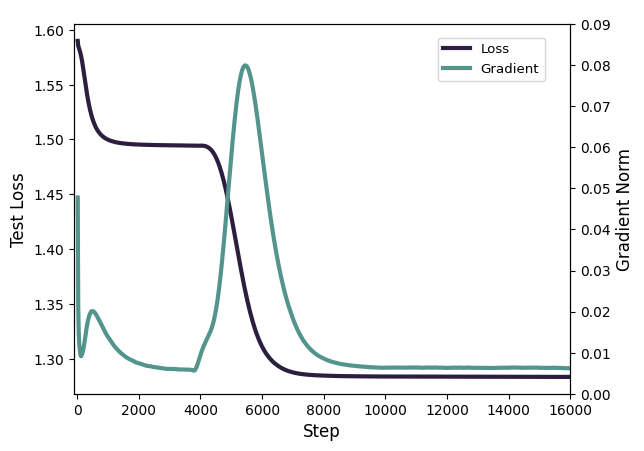

<Figure size 1200x600 with 0 Axes>

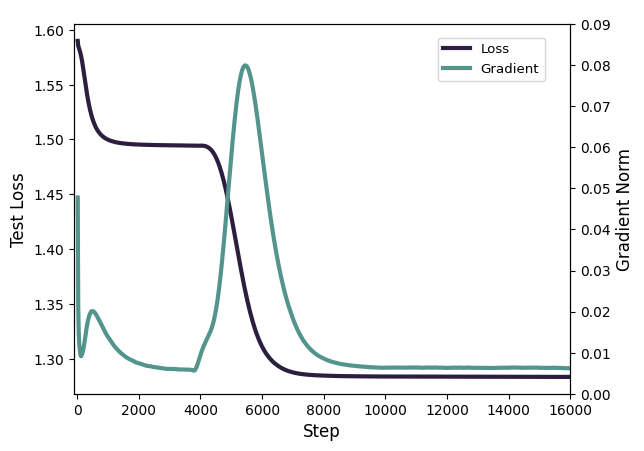

In [179]:
plot_losses(losses, bayes, save_every =1, unigram = ungiram, bigram=bigram, trigram=None, fontsize = 12)

In [180]:
QKnorm = [row["QK_norm"] for row in h]

In [181]:
A1 = [row["A_layer0_head1_norm"] for row in h]
A2 = [row["A_layer0_head0_norm"] for row in h]

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
/var/folders/ym/9dzkcpkd1zd2vh5z6_zbczk00000gp/T/ipykernel_35243/2047883545.py:25: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_ylabel("$\\frac{|| \cdot ||_2}{\sqrt{d}}$", fontsize=16)


<Figure size 1200x600 with 0 Axes>

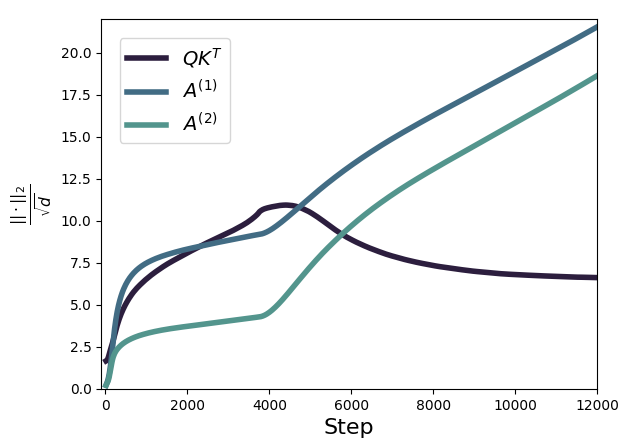

In [192]:
custom_CMAP = sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True, reverse=True)
colors = custom_CMAP(jnp.linspace(0, 1, 7))


fontsize=20,

fig = plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

# if unigram is not None:
#     plt.axhline(unigram, c=colors[6], ls="--", label="Unigram", linewidth=3 )
# if bigram is not None:
#     plt.axhline(bigram[0], c=colors[5], ls="--", label="Bayes", linewidth=3 )

ax1.plot(step, jnp.array(QKnorm)/jnp.sqrt(5), c=colors[0], linewidth=4, label="$QK^T$")
ax1.plot(step, jnp.array(A1)/jnp.sqrt(128), c=colors[2], linewidth=4, label="$A^{(1)}$")
ax1.plot(step, jnp.array(A2)/jnp.sqrt(128), c=colors[3], linewidth=4, label="$A^{(2)}$")


fig.legend(fontsize=14, loc = (0.19,0.680))
# sns.despine()
ax1.set_xlabel("Step", fontsize=16)
ax1.set_ylabel("$\\frac{|| \cdot ||_2}{\sqrt{d}}$", fontsize=16)
ax1.set_xlim(-100, 12000)
ax1.set_ylim(0, 22)
#ax2.set_ylabel("Gradient Norm", fontsize=fontsize)

#ax1.set_yticks(fontsize=fontsize * 0.8)
#ax1.set_xticks(fontsize=fontsize * 0.8)
plt.savefig("param_norm_simple.png", bbox_inches="tight")
